## Introduction to Data Science

### Unsupervised Methods - Clustering

This notebook is based on [this](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03), [this](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/) and [this](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/) posts.

In [27]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import feature_extraction
from sklearn import datasets
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html
from scipy.cluster.hierarchy import dendrogram
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster.hierarchy import cophenet
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html
from scipy.spatial.distance import pdist

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline
#%matplotlib notebook

### Datasets  

In this notebook we'll these datasets:  
+ [Iris dataset](https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv) - contains a set of 150 records under 5 attributes — Petal Length , Petal Width , Sepal Length , Sepal width and Class. Iris Setosa, Iris Virginica and Iris Versicolor are the three classes. For our Unsupervised Algorithm we give these four features of the Iris flower and predict which class it belongs to.

+ Stocks - 3000 observations with 100 predictors of stock data to predicting whether the stock will go up or down. This dataset contains 100 independent variables from X1 to X100 representing profile of a stock and one outcome variable Y with two levels : 1 for rise in stock price and -1 for drop in stock price.

+ A third dataset, used by a financial institution in an enployment test. It contains anonymized data from clients

+ [Seeds datasets](https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv) - information about wheat seeds

+ And the fifth dataset present information about cities, population and highways, and was used in a call for applications for a data scientist position.  

In [3]:
# Loading datasets
#df_iris = datasets.load_iris()  # this dataset is present in the scikit-learn distribution
df_iris = pd.read_csv('../datasets/CSVs/Iris.csv')
df_stock = pd.read_csv('../datasets/CSVs/stock_data.csv')
df_bank = pd.read_csv('../datasets/CSVs/ds_test/dados_Q3.csv')
df_seeds = pd.read_csv('../datasets/CSVs/seeds-less-rows.csv')
df_cities = pd.read_csv('../datasets/CSVs/city_dataset.csv', sep=';', decimal=',')

### Supervised vs Unsupervised Learning.

Unsupervised Learning is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.  

In supervised learning, the system tries to learn from the previous examples that are given. (On the other hand, in unsupervised learning, the system attempts to find the patterns directly from the example given.) So if the dataset is labelled it comes under a supervised problem, it the dataset is unlabelled then it is an unsupervised problem.  

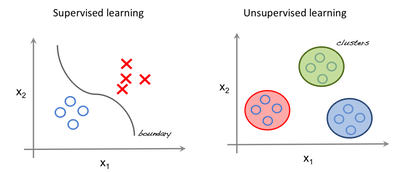

In [4]:
display(Image(os.path.join('../datasets/','Figs', 'sup-unsup.png'), width=600))

### Clustering as an Unsupervised Learning Technique

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Clustering has a large no. of applications spread across various domains. Some of the most popular applications of clustering are:  

+ Recommendation engines
+ Market segmentation
+ Social network analysis
+ Search result grouping
+ Medical imaging
+ Image segmentation
+ Anomaly detection

### Types of Clustering

Broadly speaking, clustering can be divided into two subgroups :
    
+ Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not.

+ Soft Clustering: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned.


Since the task of clustering is subjective, the means that can be used for achieving this goal are plenty. Every methodology follows a different set of rules for defining the ‘similarity’ among data points. In fact, there are more than 100 clustering algorithms known. But few of the algorithms are used popularly, let’s look at them in detail:  

+ Centroid models: These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. __K-Means clustering__ algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.  

+ Connectivity models: As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are __Hierarchical clustering__ algorithm and its variants.  

+ Distribution models: These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is __Expectation-maximization__ algorithm which uses multivariate normal distributions.  

+ Density Models: These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are __DBSCAN__ and __OPTICS__.  

### K-means Clustering  

K-means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :

1. Specify the desired number of clusters K and randomly assign them a position
2. Assign each data point the closest cluster
3. Re-compute cluster centroids : Now, re-computing the centroids for both the clusters.  
4. Re-assign each point to the closest cluster centroid
5. Repeat steps 3 and 4 until no improvements are possible

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represent.  

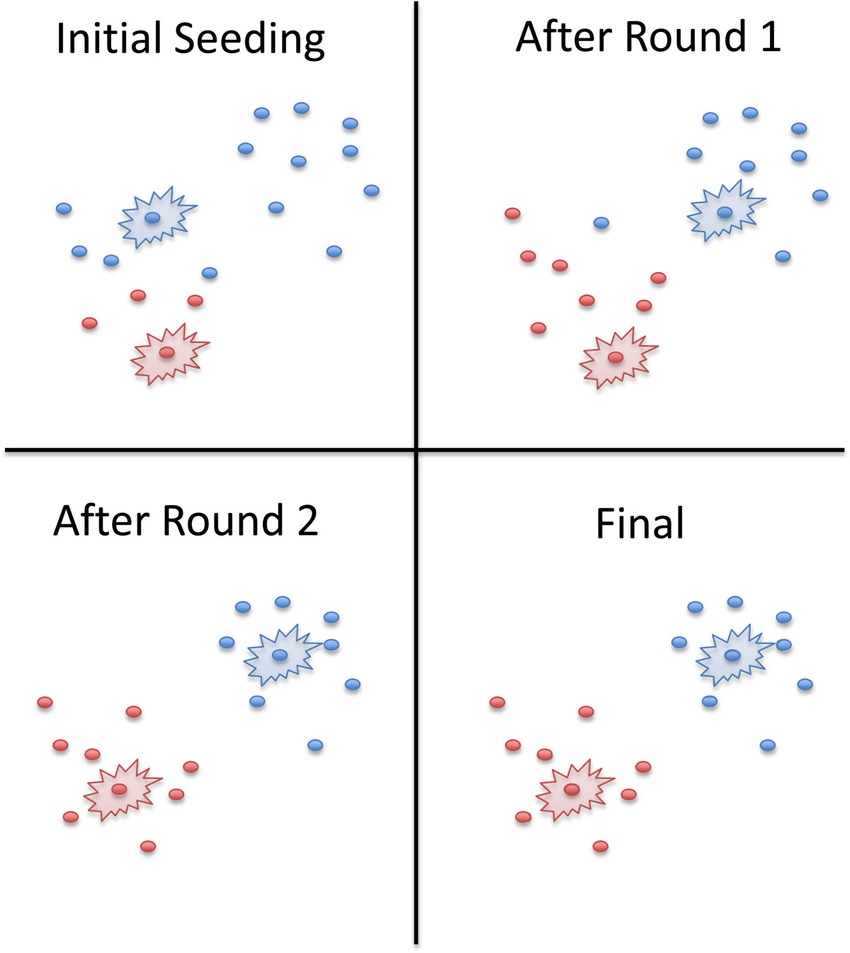

In [5]:
display(Image('../datasets/Figs/K-means.png'))

### Hierarchical Clustering

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

The results of hierarchical clustering can be shown using dendrogram as in the next figure:  

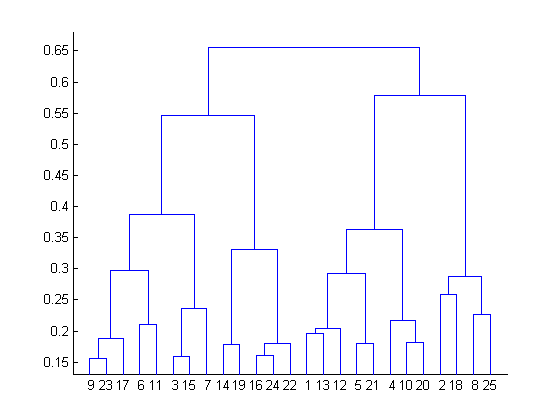

In [47]:
display(Image('../datasets/Figs/hclustering-1.png'))

At the bottom, we start with 25 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the dendrogram at which two clusters are merged represents the distance between two clusters in the data space.  

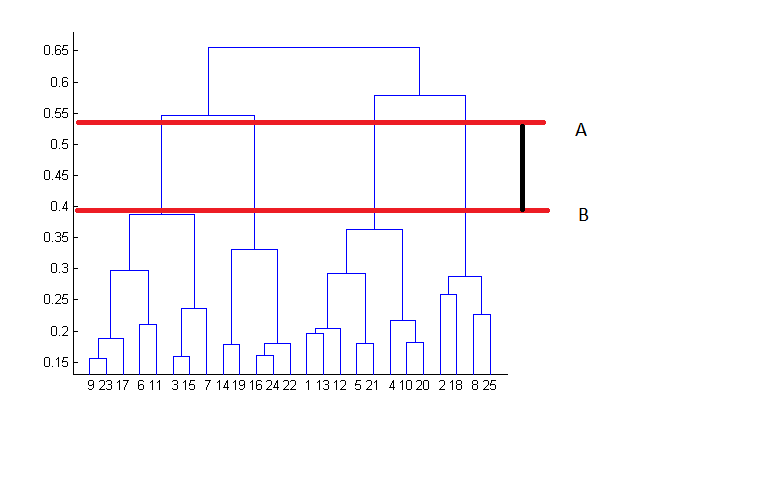

In [48]:
display(Image('../datasets/Figs/hclustering-2.png'))

The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.  

In the above example, the best choice of no. of clusters will be 4 as the red horizontal line in the dendrogram below covers maximum vertical distance A-B.  

### Clustering the seeds dataset:

In [6]:
df_seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [7]:
# Remove the grain species from the DataFrame, save for later
varieties = list(df_seeds.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = df_seeds.values

Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument.  
Assign the result to mergings.   

In [8]:
mergings = linkage(samples, method='complete')

It never hurts to play around with some other common linkage methods like 'ward', 'single', 'complete', 'average', ... and the different distance metrics like 'euclidean' (default), 'cityblock' aka Manhattan, 'hamming', 'cosine'... if you have the feeling that your data should not just be clustered to minimize the overall intra cluster variance in euclidean space. For example, you should have such a weird feeling with long (binary) feature vectors (e.g., word-vectors in text clustering).  

Plot a dendrogram using the dendrogram() function on mergings, specifying the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.  

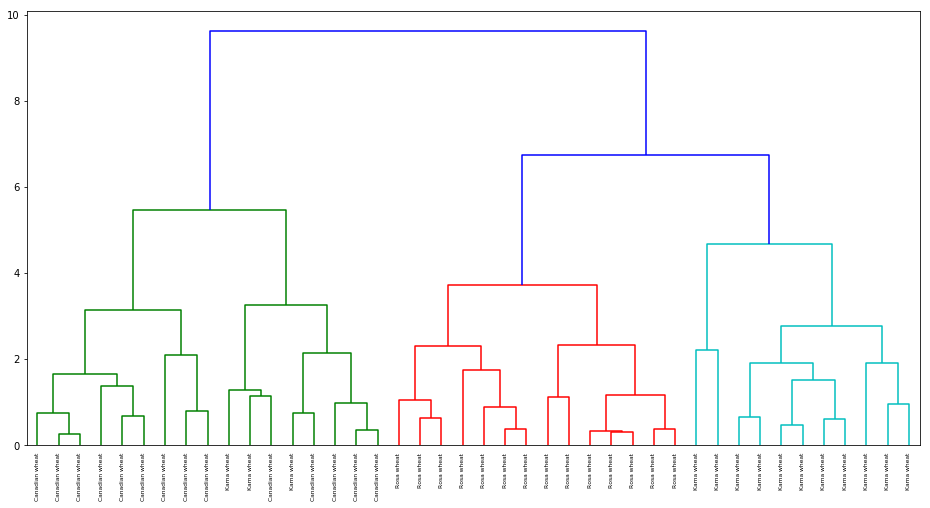

In [9]:
plt.figure(figsize=(16,8))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

### Clustering the cities dataset:

In [10]:
df_cities.head()

,cidade,ano,pib,mat1517,veiculos,motos,populacao,pop1519,pop2024,pop2529,pop60p,ibge,jovem,pjovem,pmotos,pmat,rodovia
0,Adamantina,2010,639090.51,94.96,19331.0,4556.0,33794,2673,2760,2492,17.56,3500105,7925,23.450908,23.568362,0.280997,23.0
1,Adamantina,2011,683689.22,91.96,20613.0,4987.0,33811,2573,2734,2538,17.93,3500105,7845,23.202508,24.193470,0.271982,23.0
2,Adamantina,2012,743683.94,89.34,21879.0,5389.0,33828,2477,2711,2583,18.29,3500105,7771,22.972094,24.630925,0.264101,23.0
3,Adamantina,2013,815579.34,93.64,22969.0,5608.0,33845,2382,2687,2628,18.67,3500105,7697,22.741912,24.415517,0.276673,23.0
4,Adamantina,2014,883055.34,96.98,23966.0,5845.0,33862,2289,2662,2670,19.04,3500105,7621,22.506054,24.388717,0.286398,23.0


In [11]:
df_cities.columns

Index(['cidade', 'ano', 'pib', 'mat1517', 'veiculos', 'motos', 'populacao',
       'pop1519', 'pop2024', 'pop2529', 'pop60p', 'ibge', 'jovem', 'pjovem',
       'pmotos', 'pmat', 'rodovia'],
      dtype='object')

In [12]:
useful = ['veiculos', 'motos', 'pop1519', 'pop2024', 'pop2529', 'pop60p',  'jovem', 'pmotos', 'rodovia']

In [14]:
grouped = df_cities.groupby(['ibge'])[useful].mean()
grouped = grouped.round(2)
grouped.head()

,veiculos,motos,pop1519,pop2024,pop2529,pop60p,jovem,pmotos,rodovia
ibge,,,,,,,,,
3500105,22266.17,5414.83,2389.71,2675.57,2617.43,18.68,7682.71,24.30,23.0
3500204,1736.83,315.00,255.00,272.00,269.00,17.38,796.00,18.27,4.0
3500303,16228.67,4558.17,2764.14,2937.43,3021.00,12.48,8722.57,28.11,63.0
3500402,3723.83,765.00,544.43,601.14,586.00,19.39,1731.57,20.51,27.0
3500501,10242.00,2946.17,1323.71,1340.86,1412.57,15.82,4077.14,28.77,7.0


In [15]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 3500105 to 3557303
Data columns (total 9 columns):
veiculos    645 non-null float64
motos       645 non-null float64
pop1519     645 non-null float64
pop2024     645 non-null float64
pop2529     645 non-null float64
pop60p      645 non-null float64
jovem       645 non-null float64
pmotos      645 non-null float64
rodovia     610 non-null float64
dtypes: float64(9)
memory usage: 50.4 KB


In [16]:
grouped[grouped.isnull().any(axis=1)]

,veiculos,motos,pop1519,pop2024,pop2529,pop60p,jovem,pmotos,rodovia
ibge,,,,,,,,,
3503356,689.00,156.33,145.43,150.57,137.00,18.64,433.00,22.61,NaN
3505351,1347.83,613.00,535.71,441.43,396.00,12.38,1373.14,45.95,NaN
3506607,9356.33,1529.17,2679.57,2612.43,2540.29,12.11,7832.29,16.33,NaN
3507159,1024.17,277.50,404.71,337.86,275.71,8.79,1018.29,27.08,NaN
3507803,11617.50,1807.67,1888.29,1949.00,1897.14,13.28,5734.43,15.52,NaN
3513850,747.17,206.33,116.57,137.86,123.57,19.98,378.00,27.69,NaN
3514924,1261.00,240.50,240.71,276.00,306.29,15.14,823.00,19.17,NaN
3514957,1032.33,101.50,164.71,185.86,212.57,16.06,563.14,9.86,NaN
3515129,1235.83,303.50,226.71,249.86,229.14,17.69,705.71,24.51,NaN


In [17]:
grouped.dropna(inplace=True)

In [20]:
X = grouped.values
mergings = linkage(X, method='ward', metric='euclidean')
#mergings = linkage(X, metric='jaccard')
#mergings = linkage(X, method='complete')
#mergings = linkage(X, method='complete', metric='correlation')

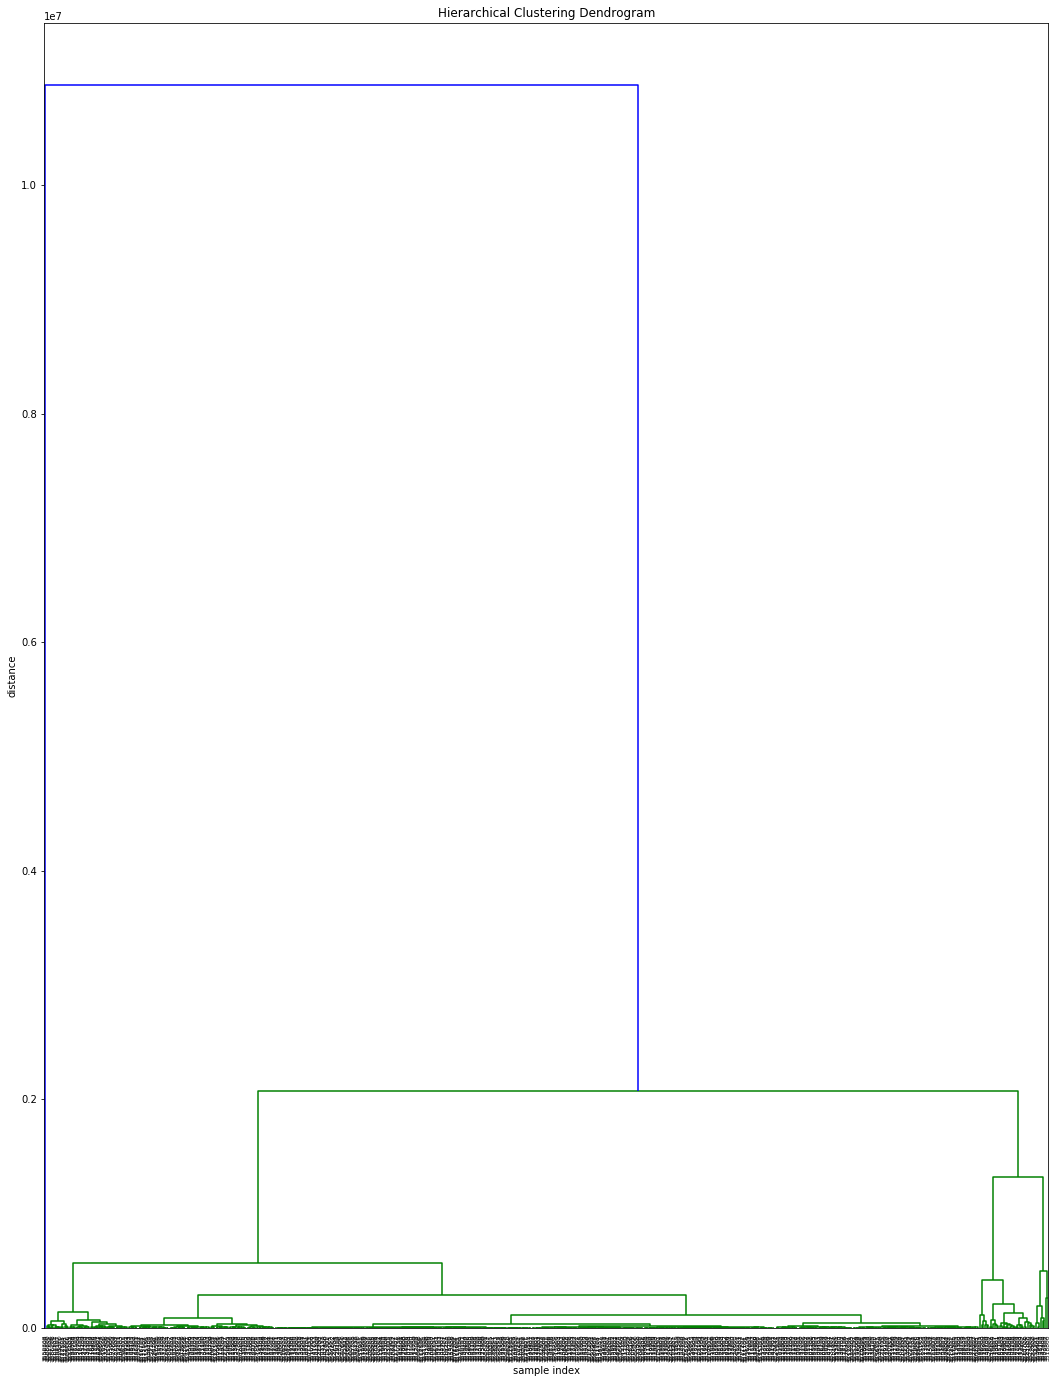

In [21]:
plt.figure(figsize=(18,24))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(mergings,
           labels=grouped.index,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [23]:
c, coph_dists = cophenet(mergings, pdist(X))
c

0.7829354987203847

In [24]:
model = KMeans(algorithm='auto', 
               copy_x=True, 
               init='k-means++', 
               max_iter=300,
               n_clusters=6, 
               n_init=10, 
               n_jobs=-1, 
               precompute_distances='auto',
               random_state=0, 
               tol=0.0001, 
               verbose=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [25]:
all_predictions = model.predict(X)
print(all_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 5 0 5 0 0 0 0 0 0 0 3 0 0 0 0 3
 5 0 0 0 0 0 5 0 5 5 0 0 0 5 0 0 0 0 0 0 0 0 0 5 0 3 0 5 3 5 0 0 0 0 5 0 0
 0 5 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 5 0 0 0 0 4 5 0 0 0 0 0 0
 0 0 0 0 5 3 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 3 0 0 0 5 5 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 5 0 0 0 0 3 5 5 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 5 0 0 3 4 0 0 0 0 5 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 0 0 0 0 3 0 0 5 0 0 0 0 5 0 0
 0 5 3 0 0 5 5 0 5 0 0 5 0 0 0 0 0 0 3 0 0 0 0 0 0 0 5 5 3 0 5 5 0 0 0 0 0
 0 0 0 0 0 0 0 5 0 0 0 0 3 0 0 5 3 0 0 0 0 0 0 0 0 5 0 5 3 0 0 0 0 5 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 2 0 0 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0 0 3
 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 5 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 

In [28]:
print(Counter(all_predictions))

Counter({0: 491, 5: 79, 3: 30, 2: 7, 4: 2, 1: 1})


(array([491.,   0.,   1.,   0.,   7.,   0.,  30.,   0.,   2.,  79.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

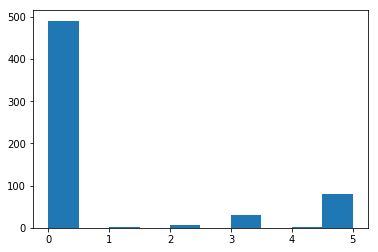

In [29]:
plt.hist(all_predictions)

### Clustering the Bank dataset:

In [54]:
df_bank.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,v_16,v_17,v_18,target
0,-2.71633,-1.19342,0.99083,-1.05256,-3.30094,1.55069,0.42254,-0.05562,-0.36810,-1.02911,-2.30431,0.55510,-7.35645,-3.22428,3.86868,1.54248,-4.42767,-2.07091,0
1,0.71298,0.20852,-0.23194,-0.51257,-0.64850,0.71211,2.19733,-1.34573,0.50909,1.62411,-1.95859,-1.96238,0.37942,-0.89947,5.45270,-0.58671,-1.10551,0.22832,1
2,5.17600,1.45809,-0.80756,3.07257,-0.67239,1.28744,1.78398,-0.23472,1.47352,-0.71835,-1.35498,-2.05840,5.69775,0.95301,5.12508,-2.80989,0.32426,4.71143,0
3,-0.60410,1.40978,-1.05125,-1.35177,3.43279,-1.46178,-3.05143,2.01119,0.80983,-1.25365,-1.27266,-1.27309,1.13526,1.78103,-3.43098,-0.50417,0.26186,0.81196,0
4,-2.76027,-0.61459,-0.28925,0.05680,-3.56463,0.62810,-0.35928,-0.33190,1.34510,-1.47069,-1.29790,-0.69772,-2.77076,-2.69465,3.93880,-1.06614,-3.30641,-0.33992,0


In [55]:
df_bank.columns

Index(['v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_17', 'v_18',
       'target'],
      dtype='object')

In [57]:
df_bank.target.unique()

array([0, 1])

In [39]:
len(df_bank)

3000

In [66]:
# Remove the target from the DataFrame, save for later
targets = list(df_bank.pop('target'))

# Extract the measurements as a NumPy array
samples = df_bank.values

In [67]:
mergings = linkage(samples, method='complete')

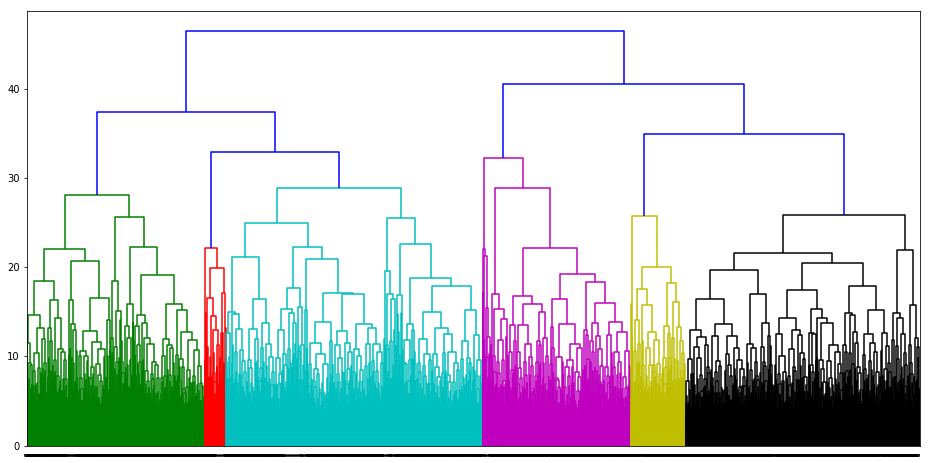

In [69]:
fig, ax = plt.subplots(figsize=(16,8))

dendrogram(mergings,
           p=100, 
           truncate_mode=None, 
           color_threshold=None, 
           get_leaves=True, 
           orientation='top', 
           labels=targets,
           count_sort=False, 
           distance_sort=False, 
           show_leaf_counts=True, 
           no_plot=False, 
           no_labels=False, 
           #color_list=None, 
           leaf_font_size=5, 
           leaf_rotation=90, 
           leaf_label_func=None, 
           #no_leaves=False, 
           show_contracted=False, 
           link_color_func=None, 
           ax=ax
           )
plt.show()

Two important things that you should know about hierarchical clustering are:

+ This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.
+ The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters :  
    + Euclidean distance: ||a-b||2 = √(Σ(ai-bi))
    + Squared Euclidean distance: ||a-b||22 = Σ((ai-bi)2)
    + Manhattan distance: ||a-b||1 = Σ|ai-bi|
    + Maximum distance:||a-b||INFINITY = maxi|ai-bi|
    + Mahalanobis distance: √((a-b)T S-1 (-b))   {where, s : covariance matrix}

 
Difference between K Means and Hierarchical clustering

+ Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
+ In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
+ K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
+ K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram

#### Exploring Iris Dataset

In [10]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


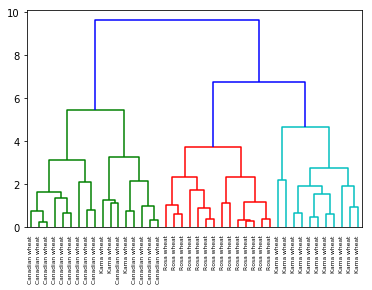

Difference between K Means and Hierarchical clustering

    Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
    In K Means clustering, as we start with an arbitrary choice of clusters, the results generated by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
    K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
    K-Means doesn't allow noisy data, while in Hierarchical we can directly use noisy dataset for clustering.

t-SNE Clustering

It is one of the unsupervised learning method for visualisation. t-SNE stands for t-distributed stochastic neighbor embedding. It maps high dimensional space into a 2 or 3 dimensional space which can be visualised. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

t-SNE Clustering Implementation in Python for Iris Dataset.

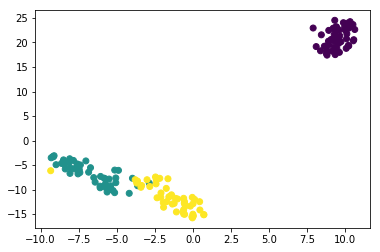

In [11]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
df_iris = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

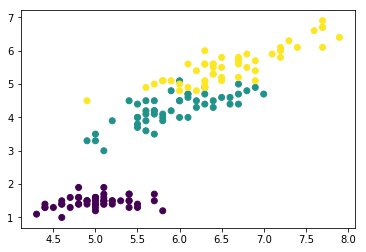

In [8]:
# Plotting
plt.scatter(x_axis, y_axis, c=df_iris.target)
plt.show()

Here as the Iris dataset has four features(4d) it is transformed and represented in two dimensional figure. Similarly t-SNE model can be applied to a dataset which has n-features.
DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an replacement to K-means in predictive analytics. It doesn’t require that you input the number of clusters in order to run. But in exchange, you have to tune two other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

DBSCAN Clustering in Python

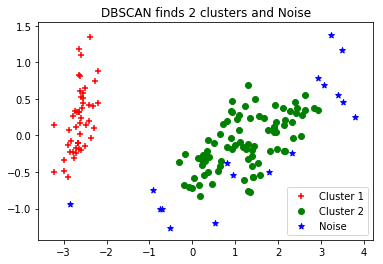

In [9]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load Dataset
df_iris = datasets.load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(df_iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(df_iris.data)
pca_2d = pca.transform(df_iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

More Unsupervised Techniques:

    Principal Component Analysis (PCA)
    Anomaly detection
    Autoencoders
    Deep Belief Nets
    Hebbian Learning
    Generative Adversarial Networks(GANs)
    Self-Organizing maps